# Trabajo Práctico N° 3: Clustering
## Natalia Mellino

In [59]:
# imports
library(MASS)
install.packages("e1071") 
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("e1071"):
“installation of package ‘e1071’ had non-zero exit status”


## Ejercicio 1

 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  

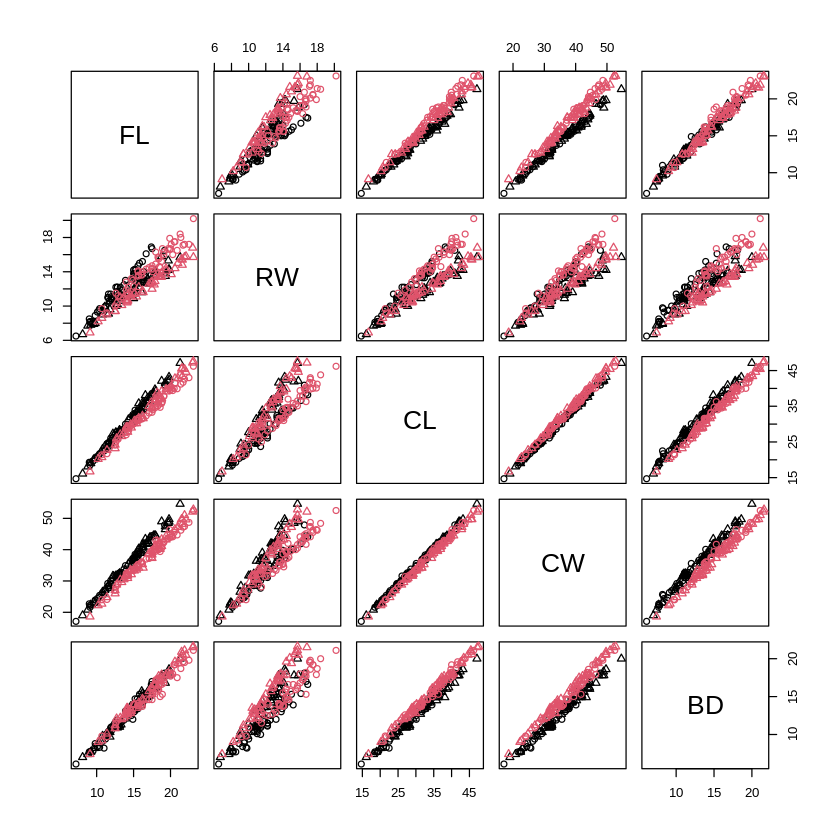

In [60]:
data(crabs)
summary(crabs)
plot(crabs[,4:8],col=as.numeric(crabs[,1]),pch=as.numeric(crabs[,2]))


In [70]:
# Lo convertimos a escala logaritmica y le hacemos un scale
crabs.log <- crabs
crabs.log[,4:8] <- log(crabs[,4:8])
crabs.log.scaled <- crabs.log
crabs.log.scaled[, 4:8] <- scale(crabs.log[,4:8])
crabs.log.scaled.pca <- prcomp(crabs.log.scaled[,4:8], retx=TRUE)$x


In [72]:
crab.log.km <- kmeans(crabs.log[, 4:8], cent=2)
crab.log.scaled.km <- kmeans(crabs.log.scaled[, 4:8], cent=2)
crab.log.scaled.pca.km <- kmeans(crabs.log.scaled.pca, cent=2)

In [63]:
check.cluster <- function(cc, original){
  cont.table <- table(original,cc$cluster)
  class.match <- matchClasses(as.matrix(cont.table),method="exact")
  print(cont.table[,class.match])
  print(cont.table)
}

In [68]:
check.cluster(crab.log.km, crabs$sex)
check.cluster(crab.log.km, crabs$sp)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        
original  1  2
       F 64 36
       M 61 39
        
original  1  2
       F 64 36
       M 61 39
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        
original  2  1
       B 48 52
       O 27 73
        
original  1  2
       B 52 48
       O 73 27


In [65]:
check.cluster(crab.log.scaled.km, crabs$sex)
check.cluster(crab.log.scaled.km, crabs$sp)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        
original  2  1
       F 64 36
       M 61 39
        
original  1  2
       F 36 64
       M 39 61
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        
original  1  2
       B 48 52
       O 27 73
        
original  1  2
       B 48 52
       O 27 73


In [73]:
check.cluster(crab.log.scaled.pca.km, crabs$sex)
check.cluster(crab.log.scaled.pca.km, crabs$sp)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        
original  2  1
       F 64 36
       M 61 39
        
original  1  2
       F 36 64
       M 39 61
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        
original  1  2
       B 48 52
       O 27 73
        
original  1  2
       B 48 52
       O 27 73


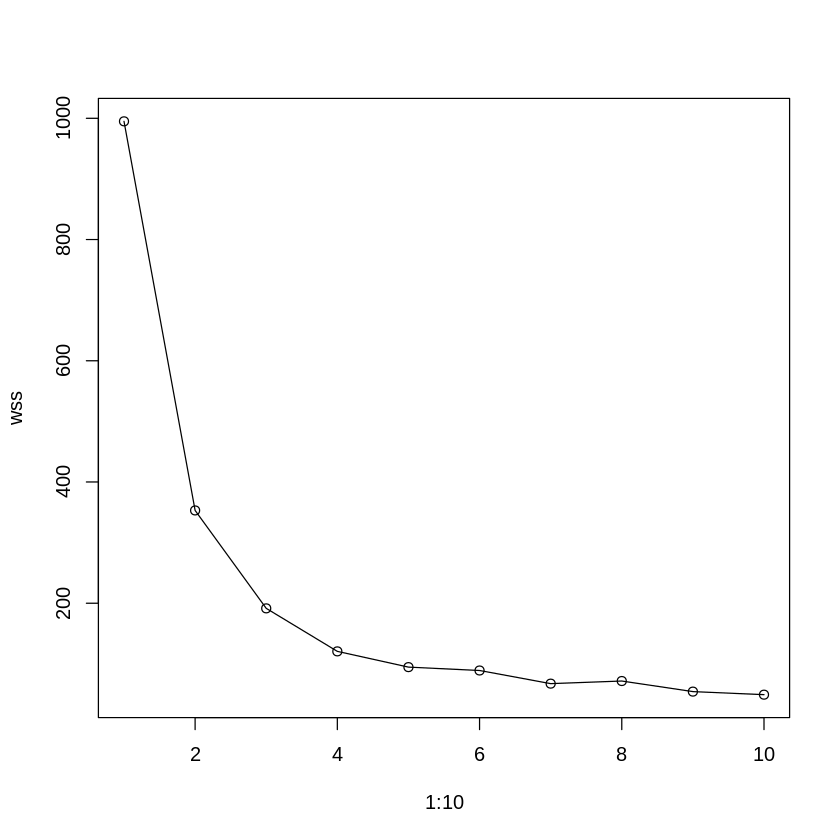

In [66]:
wss<- NULL
for (i in 1:10){
  fit = kmeans(crabs.log.scaled[, 4:8], centers=i)
  wss = c(wss, fit$tot.withinss)
}
plot(1:10, wss, type = "o")